# Hybrid Deep Learning Model for Credit Card Fraud Detection

In this part, we shall combine both Supervised Deep Learning (ANN) and Unsupervised Deep Learning (SOM) to create a Hybrid Deep Learning Model for our Credit card fraud detection. In this part, using Supervised approach to DL, we shall also calculate the probability of the customer being a fraud.

# Part 1- Identify the Frauds with SOM

# Self Organizing Map

In this part, we will detect the fraudulent customers applying for credit cards using an unsupervised approach of SOM. We make use of the fact that the fraudulent customers will be the customers who do not follow the normal patterns of genuine customers, so these will be defined by the outliers in our data. 

We create training samples by removing the last column, corresponding to the labels 1 and 0; 1 for credit card approved and 0 for not approved.

## Importing the Libraries

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the Data Set

In [97]:
data= pd.read_csv("C:\\Users\\kava2\\Documents\\Udemy\\Deep LearningA-Z\\Datasets\\SOM\\Credit_Card_Applications.csv")
x= data.iloc[:,:-1].values
y= data.iloc[:, -1].values

## Feature Scaling

In [98]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler(feature_range=(0,1))
x= sc.fit_transform(x)

## Training the SOM

We shall build our SOM model using the MiniSOM 1.0 (Minimalistic Implemenatation of SOM) library. To implement the MiniSOM library, we have downloaded the .py file and included it in our working directory as a .ipynb file.


In [99]:
from minisom import MiniSom

# The first two parameters, x and y correspond to the dimensions of the grid of the Self Organizing Map. 
# Input length is the number of features; alpha is learning rate; sigma is the radius of the neighbourhood of the neuron
# for the SOM
som= MiniSom(x=10,y=10, input_len=x.shape[1], sigma=1.0, learning_rate=0.5)

# Initialize random weights for the input vectors
som.random_weights_init(x)

# Train our SOM 
som.train_random(x, num_iteration=100)

## Visualizing the Results

Now, we are going to visualize our trained SOM, which shows all the Best Winning Nodes in a 2-dimensional plot. 

We are going to take a look at the Mean Interneuron Distance (MID) of the winning nodes. Higher the MID, more the distance between the winning node and its neighbours and hence, more the chances of the winning neuron being an outlier. Outliers indicate that the corresponding customer is a fraud. 

We shall use different colors to represent the neurons of different MID ranges. We shall also mark the customer neurons, indicating if they got approval for loans or not.

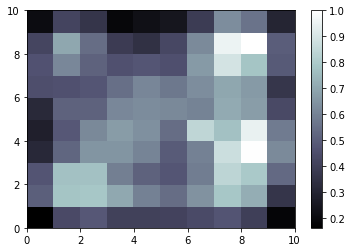

In [100]:
# Import Specific libraries
from pylab import bone, plot, colorbar, pcolor, show

# Initialize a blank window for the plot using bone
bone()

# Assign colors to MID ranges using pcolor- 'distance_map' method outputs a matrix containing all winning neuron MID Values
pcolor(som.distance_map().T)

# Add legend using colorbar
colorbar()

# Mark neurons, indicating approval or no approval
#markers= ['o', 's']
#colors= ['r', 'g']
#for i, j in enumerate(x):       # i for customer index, j for corresponding class- approved or not
    #w= som.winner(j)            # gives winner nodes of x data set
    #plot(w[0] + 0.5,            # plot markers at centre of cells- w[0]- rows, w[1]-columns, +0.5 for placing in centre
        #w[1] + 0.5,
        #markers[y[i]],
        #colors[y[i]],
        #markeredgecolor=markers[y[i]],
        #markerfacecolor= 'None',
        #markersize=10,
        #markeredgewidth=2)
show()
    

So, from the above Map we can see that the neurons of white color correspond to the potential frauds. We can get the actual list of the fraudulent customers by taking the inverse transform of the winning node.

## Finding the Frauds

We can see that there are two white neurons in the color map. So, we will have to concatenate the list of customers represented by each of these two neurons to get the full list of potential cheaters.

In [101]:
mappings= som.win_map(x) # returns dictionary of all customers mapped to all the winning nodes
mappings

defaultdict(list,
            {(6,
              4): [array([0.84268147, 1.        , 0.12526316, 0.40928571, 0.5       ,
                     0.23076923, 0.375     , 0.05561404, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.05      , 0.01212   ]), array([3.60166420e-01, 1.00000000e+00, 1.32781955e-01, 5.35714286e-02,
                     0.00000000e+00, 3.84615385e-01, 3.75000000e-01, 1.89473684e-02,
                     0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
                     5.00000000e-01, 6.00000000e-02, 6.70000000e-04]), array([0.12811888, 1.        , 0.2793985 , 0.125     , 0.5       ,
                     0.23076923, 0.375     , 0.01754386, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.116     , 0.        ]), array([4.64667700e-01, 1.00000000e+00, 7.89473684e-02, 6.25000000e-02,
                     0.00000000e+00, 5.38461538e-01, 3.75000000e-01, 8.19298246e-02,
                

We can see from the above dictionary that for each of the location (a,b) in the heat map, we get a set of arrays of customers represented by that neuron; each array in the set represents a customer and the values in the array contain the scaled values of the variables or attributes.

We shall use inverse transform to get the original customer id of these customers.


In [102]:
# get the customers associated with the outlier winning nodes
frauds= np.concatenate((mappings[(8,1)], mappings[(8,2)]), axis=0)
# Get the original variables by taking inverse transform
frauds= sc.inverse_transform(frauds)

In [103]:
frauds         # the first element in each array is the original customer ID of the cheater.

array([[1.5687688e+07, 0.0000000e+00, 2.1670000e+01, 1.1500000e+01,
        1.0000000e+00, 5.0000000e+00, 3.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 1.1000000e+01, 1.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [1.5638610e+07, 0.0000000e+00, 5.5750000e+01, 7.0800000e+00,
        2.0000000e+00, 4.0000000e+00, 8.0000000e+00, 6.7500000e+00,
        1.0000000e+00, 1.0000000e+00, 3.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 1.0000000e+02, 5.1000000e+01],
       [1.5668679e+07, 0.0000000e+00, 4.7420000e+01, 3.0000000e+00,
        2.0000000e+00, 1.4000000e+01, 4.0000000e+00, 1.3875000e+01,
        1.0000000e+00, 1.0000000e+00, 2.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 5.1900000e+02, 1.7050000e+03],
       [1.5738487e+07, 0.0000000e+00, 2.0750000e+01, 1.0250000e+01,
        2.0000000e+00, 1.1000000e+01, 4.0000000e+00, 7.1000000e-01,
        1.0000000e+00, 1.0000000e+00, 2.0000000e+00, 1.0000000e+00,
        2.0000000e+00,

# Part 2- Going From Unsupervised to Supervised Deep Learning

## Creating the Matrix of Features

In [104]:
# Take all columns except the customer ID column
customers= data.iloc[:, 1:]

## Creating the Dependent Variable

The dependent variable needs to have information indicating if the customers were frauds or not; to do this, we shall use the customer IDs of the outlier customers discovered in the Unsupervised part of the project and mark them with labels 1, indicating they are frauds. We shall mark the rest with 0, indicating that they were not frauds.

In [105]:
is_fraud= np.zeros(len(data))
for i in range(len(data)):
    if data.iloc[i,0] in frauds:
        is_fraud[i]=1

## Training the ANN to Predict the Frauds

### Feature Scaling

In [106]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
customers= sc.fit_transform(customers)

## Creating the ANN

### Importing the Keras Libraries and Packages

In [107]:
from keras.models import Sequential
from keras.layers import Dense

### Initializing the ANN

In [108]:
classifier= Sequential()

### Adding the Input Layer and the First Hidden Layer

In [109]:
classifier.add(Dense(units=2, kernel_initializer='uniform', activation='relu', input_dim=15)) #units- no.of neurons

### Adding the Output Layer

In [110]:
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

### Compiling the ANN

In [111]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Fitting the ANN to the Training Set

In [112]:
classifier.fit(customers, is_fraud, batch_size=1, epochs=2)

Epoch 1/2
690/690 [==============================] - 1s 992us/step - loss: 0.4542 - accuracy: 0.9493
Epoch 2/2
690/690 [==============================] - 0s 714us/step - loss: 0.2154 - accuracy: 0.9522


### Predicting the Probabilities of Frauds

In [123]:
# Concatenate the probabilities of cheating of each customer and their customer ID
y_pred= classifier.predict(customers)
y_pred= np.concatenate((data.iloc[:,0:1].values, y_pred), axis=1)

# Sort the 2-D array in descending order of the probabilities of cheating
y_pred= y_pred[y_pred[:,1].argsort()] # we have subset by column to only sort by 1 column; i.e, the probability column

In [127]:
# Now the y_pred array contains the list of customers in descending order of their probabilities of cheating
y_pred

array([[1.56009750e+07, 2.34144554e-03],
       [1.55991520e+07, 2.51525058e-03],
       [1.56430560e+07, 2.97884247e-03],
       ...,
       [1.56747500e+07, 3.33112061e-01],
       [1.57063940e+07, 3.33112061e-01],
       [1.55982660e+07, 3.33112061e-01]])